# Exercise 2: Regularization

## (a) 
Simulate a data set with $n = 100$ observations based on the relationship $Y = \sin(x_1) + \varepsilon$ with noise term $\varepsilon$ following some distribution. Simulate $p=100$ additional covariates $x_2,\ldots,x_{101}$ that are not related to $Y$.

In [ ]:
# if you want to reproduce the results, please install the following packages
!pip install numpy==1.26.4 matplotlib==3.8.4 scikit-learn==1.5.2

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')


np.random.seed(509)

num_points = 100
num_additional_covs = 100

# the reader may find it interesting to play around with the noise amount
noise_amount = 0.1 

X = np.random.randn(num_additional_covs, num_additional_covs + 1)

Y = np.sin(X[:, 0]) + np.random.randn(num_points) * noise_amount
print(f"X shape: {X.shape}\nY shape: {Y.shape}")

X shape: (100, 101)
Y shape: (100,)


let's see the relationship of Y with x_1 and an unrelated covaraite x_2

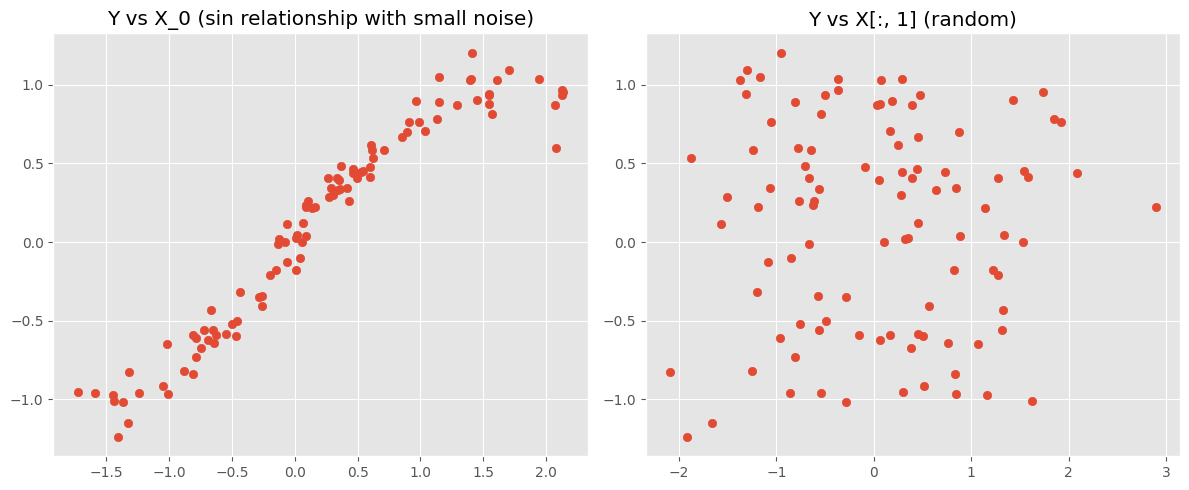

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X[:, 0], Y)
axs[0].set_title('Y vs X_0 (sin relationship with small noise)')

axs[1].scatter(X[:, 1], Y)
axs[1].set_title('Y vs X[:, 1] (random)')

plt.tight_layout()
plt.show()


## (b)
On this data set, use different models (and software packages) of your choice to demonstrate
- overfitting and underfitting;
- $L1$, $L2$ and elastic net regularization;
- the underdetermined problem;
- the bias-variance trade-off;
- early stopping using a simple neural network. %(use a simple neural network as in Exercise 2).


### overfitting and underfitting

Let's try to approximate the (sinusoidal) relationship between Y and x_1 with a simple linear model 
and with a polynomial model of degree 7. 

Also, in order for us to see the effects of under/over-fitting not only usually but also numerically, lets split the data into training and test sets and calculate the training and test errors for each model.

#### Underfitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

X_1 = X[:, 0].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_1, Y, 
                                                    test_size=0.2, 
                                                    random_state=509)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Simple Linear Regression")
print(f"Train MSE: {train_mse:.4f}\nTest MSE: {test_mse:.4f}")
print(f"Test error is higher by {((test_mse - train_mse) / train_mse) * 100:.2f}%")

Simple Linear Regression
Train MSE: 0.0313
Test MSE: 0.0595
Test error is higher by 90.07%


visual inspection

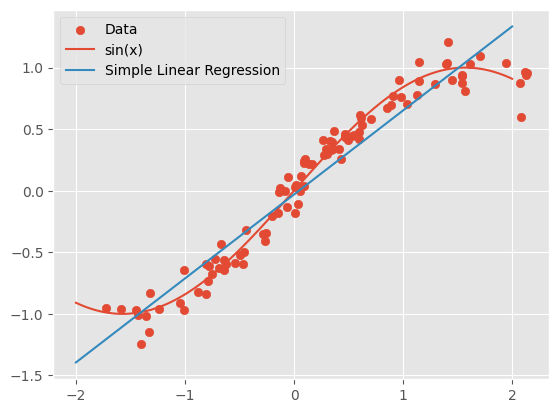

In [ ]:
plt.scatter(X_1, Y, label='Data')

# noiseless DGP
x_vals = np.linspace(-2, 2, 100)
y_vals = np.sin(x_vals)
plt.plot(x_vals, y_vals, label='sin(x)')

# simple linear regression
plt.plot(x_vals, lr.coef_[0] * x_vals + lr.intercept_,
         label='Simple Linear Regression')
plt.legend()

The training error was ~0.03 and test error was ~0.06 which may indicate that the model is overfitting, but we must first ask ourselves whether or not the results on the training set are actually good. 

By plotting the predictions against the actual data we can see that the model is lacks complexity and we should first deal with the underfitting problem.

#### Overfitting

In [70]:
# now let's try polynomial regression
poly_degree = 50
poly = PolynomialFeatures(degree=poly_degree)
poly.fit(X_train) 

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# don't get confused by the model name
# we will be fitting it on the transformed data
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nPolynomial Regression (degree=7)")
print(f"Train MSE: {train_mse:.4f}\nTest MSE: {test_mse:.4f}")
print(f"Test error is higher by {((test_mse - train_mse) / train_mse) * 100:.2f}%")


Polynomial Regression (degree=7)
Train MSE: 0.1385
Test MSE: 145219784.4922
Test error is higher by 104827038582.99%


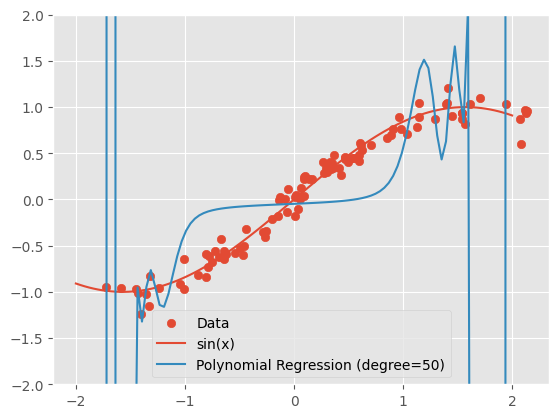

In [71]:
plt.scatter(X_1, Y, label='Data')

# noiseless DGP
x_vals = np.linspace(-2, 2, 100)
y_vals = np.sin(x_vals)
plt.plot(x_vals, y_vals, label='sin(x)')

plt.plot(x_vals, poly_reg.predict(poly.transform(x_vals.reshape(-1, 1))),
            label=f'Polynomial Regression (degree={poly_degree})')

# setting limits to make the plot readable (the model sometimes predicts extreme values)
plt.ylim(-2, 2)


plt.legend()

In this case both from visual inspection and from looking at the training and test errors we can see that the model is extreamly overfitting the data. By looking at the predictions for the points around -1.3 we can nicely see how much the model bends to pass through the training data points, and learns the noise instead of the actual pattern.

The reader may find it interesting to decrease the degree of the polynomial to make the demonstration less extreme, and for degree = 7 you may even notice that the train/test errors alone indicate less overfitting than in the case of simple linear regression.